In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../../utils/')
import src_utils
import seaborn as sns

# 1. Read in data

In [2]:
# Heatmap
resid_map = pd.read_csv('../heatmaps/raw_resid_heatmap.csv', index_col=0)

# Masks for clients
clients = np.loadtxt('../../utils/analysis_utils/client_mask.csv').astype(bool)
strong_clients = np.loadtxt('../../utils/analysis_utils/strong_client_mask.csv').astype(bool)
ihb_clients = np.loadtxt('../../utils/analysis_utils/inhibited_clients.csv').astype(bool)
dep_clients = np.loadtxt('../../utils/analysis_utils/dependent_clients.csv').astype(bool)

# SASA data
sasa_df = pd.read_csv('../../utils/analysis_utils/sasa.csv', index_col=0)

# Trim SASA df to only positions included in the DMS
sasa_df = sasa_df.loc[src_utils.__cd_pos__, :]

# Is there a correlation between SASA asnd client status?

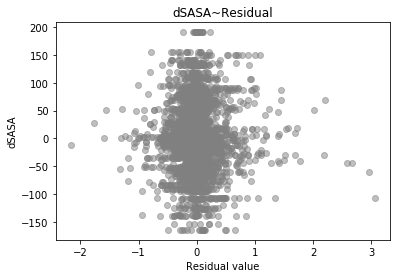

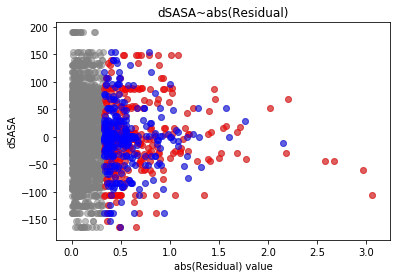

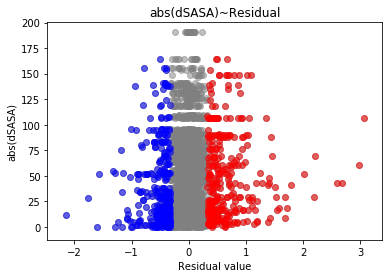

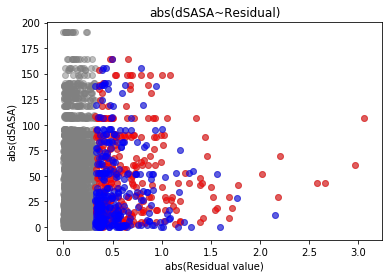

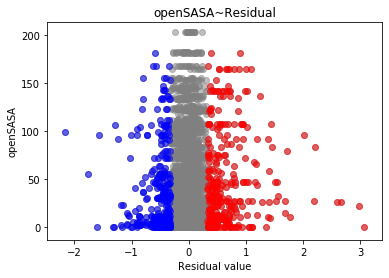

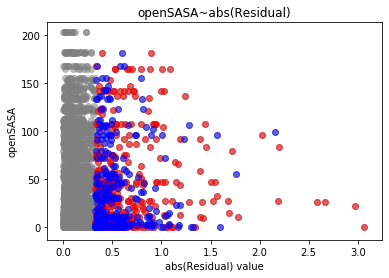

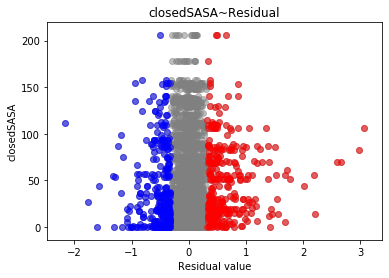

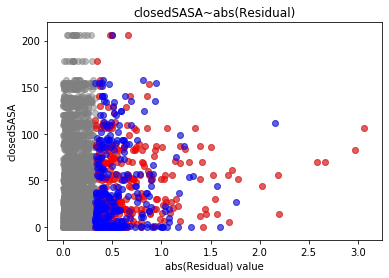

In [4]:
"""dSASA"""
# Expand dSASA it fits resid_map layout
dSASA = sasa_df['diff_sasa'].values
dSASA = np.expand_dims(dSASA, axis=1)
dSASA = np.repeat(dSASA, repeats=resid_map.shape[1], axis=1)

# Raw plot
plt.scatter(resid_map.values.flatten(), dSASA.flatten(), color='gray', alpha=0.5, label='All points')
# plt.scatter((resid_map.values[clients]).flatten(), dSASA[clients].flatten())
plt.xlabel('Residual value')
plt.ylabel('dSASA')
plt.title('dSASA~Residual')
plt.show()

# Absolute value of residual to define client strength
plt.scatter(abs(resid_map.values).flatten(), dSASA.flatten(), color='gray', alpha=0.5)
# plt.scatter(abs(resid_map.values[clients]).flatten(), dSASA[clients].flatten())
plt.scatter(abs(resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter(abs(resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('Residual value')
plt.xlabel('abs(Residual) value')
plt.ylabel('dSASA')
plt.title('dSASA~abs(Residual)')
plt.show()

# Absolute value of dSASA
plt.scatter(resid_map.values.flatten(), abs(dSASA).flatten(), color='gray', alpha=0.5)
#plt.scatter(resid_map.values[clients].flatten(), abs(dSASA[clients]).flatten())
plt.scatter((resid_map.values[ihb_clients]).flatten(), abs(dSASA[ihb_clients]).flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter((resid_map.values[dep_clients]).flatten(), abs(dSASA[dep_clients]).flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('Residual value')
plt.xlabel('Residual value')
plt.ylabel('abs(dSASA)')
plt.title('abs(dSASA)~Residual')
plt.show()

# Absolute value of both
plt.scatter(abs(resid_map.values).flatten(), abs(dSASA).flatten(), color='gray', alpha=0.5)
#plt.scatter(abs(resid_map.values[clients]).flatten(), abs(dSASA[clients]).flatten())
plt.scatter(abs(resid_map.values[ihb_clients]).flatten(), abs(dSASA[ihb_clients]).flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter(abs(resid_map.values[dep_clients]).flatten(), abs(dSASA[dep_clients]).flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('Residual value')
plt.xlabel('abs(Residual value)')
plt.ylabel('abs(dSASA)')
plt.title('abs(dSASA~Residual)')
plt.show()


"""Open SASA"""
# Expand dSASA it fits resid_map layout
dSASA = sasa_df['open'].values
dSASA = np.expand_dims(dSASA, axis=1)
dSASA = np.repeat(dSASA, repeats=resid_map.shape[1], axis=1)

# Raw plot
plt.scatter(resid_map.values.flatten(), dSASA.flatten(), color='gray', alpha=0.5, label='All points')
plt.scatter((resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter((resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('Residual value')
plt.ylabel('openSASA')
plt.title('openSASA~Residual')
plt.show()

# Absolute value of residual to define client strength
plt.scatter(abs(resid_map.values).flatten(), dSASA.flatten(), color='gray', alpha=0.5, label='All points')
plt.scatter(abs(resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter(abs(resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('abs(Residual) value')
plt.ylabel('openSASA')
plt.title('openSASA~abs(Residual)')
plt.show()


"""Closed SASA"""
# Expand dSASA it fits resid_map layout
dSASA = sasa_df['closed'].values
dSASA = np.expand_dims(dSASA, axis=1)
dSASA = np.repeat(dSASA, repeats=resid_map.shape[1], axis=1)

# Raw plot
plt.scatter(resid_map.values.flatten(), dSASA.flatten(), color='gray', alpha=0.5, label='All points')
plt.scatter((resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter((resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('Residual value')
plt.ylabel('closedSASA')
plt.title('closedSASA~Residual')
plt.show()

# Absolute value of residual to define client strength
plt.scatter(abs(resid_map.values).flatten(), dSASA.flatten(), color='gray', alpha=0.5, label='All points')
plt.scatter(abs(resid_map.values[ihb_clients]).flatten(), dSASA[ihb_clients].flatten(), color='r', alpha=0.5, label='Hsp90 inhibited')
plt.scatter(abs(resid_map.values[dep_clients]).flatten(), dSASA[dep_clients].flatten(), color='b', alpha=0.5, label='Hsp90 dependent')
plt.xlabel('abs(Residual) value')
plt.ylabel('closedSASA')
plt.title('closedSASA~abs(Residual)')
plt.show()


In [5]:
pos_ave = np.nanmean(resid_map.values, axis=1)
pos_mean_abs = np.nanmean(abs(resid_map.values), axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [21]:
from scipy.signal import hilbert

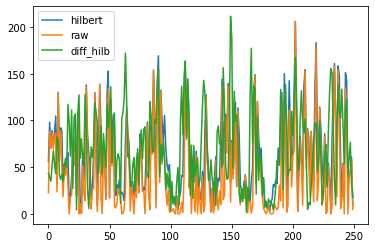

In [42]:
hilb_sasa = abs(hilbert(sasa_df['closed']))
hilb_diff_sasa = abs(hilbert(sasa_df['closed'] - sasa_df['open']))
plt.plot(np.arange(250), hilb_sasa, label='hilbert')
plt.plot(np.arange(250), sasa_df['closed'], label='raw')
plt.plot(np.arange(250), hilb_diff_sasa, label='diff_hilb')
plt.legend()
plt.show()

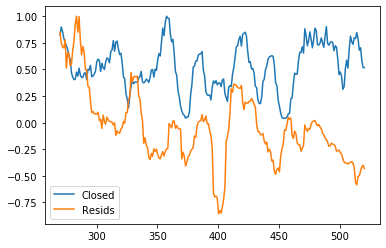

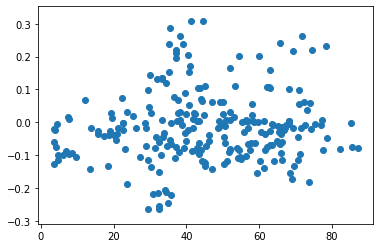

In [71]:
def moving_average(a, n=10) :
    ret = np.nancumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

positions = np.arange(250)
windowed_resids = moving_average(pos_ave)
windowed_positions = moving_average(positions)
windowed_sasa_cl = moving_average(sasa_df['closed'])
windowed_sasa_op = moving_average(sasa_df['open'])
windowed_sasa_diff = moving_average(sasa_df['closed'] - sasa_df['open'])

#window_idx = np.argwhere(windowed_positions > 125)[0][0]
lin_pos = np.linspace(270, 520, len(windowed_positions))
plt.plot(lin_pos, windowed_sasa_cl / max(windowed_sasa_cl), label='Closed')
#plt.plot(lin_pos, windowed_sasa_op / max(windowed_sasa_op), label='Open')
#plt.plot(lin_pos, windowed_sasa_diff / max(abs(windowed_sasa_diff)), label='Diff')
plt.plot(lin_pos, windowed_resids / max(abs(windowed_resids)), label='Resids')
plt.legend()
plt.show()

plt.scatter(windowed_sasa_cl, windowed_resids)
#f3_ax1.plot(lin_pos, windowed_resids[:window_idx], c='k')
#x_lim = f3_ax2.get_xlim()
#y_lim = (min(windowed_resids), max(windowed_resids))
#f3_ax1.set_xlim(x_lim)
#f3_ax1.set_ylim(y_lim)
#f3_ax1.axhline(0, linewidth=0.5, c='grey')
#f3_ax1.axis('off')

In [93]:
# Client masks
client_mask = np.loadtxt('../../utils/analysis_utils/client_mask.csv').astype(bool)
strong_client_mask = np.loadtxt('../../utils/analysis_utils/strong_client_mask.csv').astype(bool)
ihb_client_mask = np.loadtxt('../../utils/analysis_utils/inhibited_clients.csv').astype(bool)
dep_client_mask = np.loadtxt('../../utils/analysis_utils/dependent_clients.csv').astype(bool)

# Get number of inhibited and dependent
num_dep = np.sum(dep_client_mask * 1, axis=1)
num_ihb = np.sum(ihb_client_mask * 1, axis=1)
num_mut = np.sum(~np.isnan(resid_map.values), axis=1)

# Calculate percentage
perc_dep = 100 * (num_dep / num_mut)
perc_ihb = 100 * (num_ihb / num_mut)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [128]:
n=5
idx_most_dep = np.where(perc_dep > 60)
idx_most_ihb = np.where(perc_ihb > 60)
idx_most_ihb = pos_ave.argsort()[-n:][::-1]
idx_most_dep = pos_ave.argsort()[:n]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


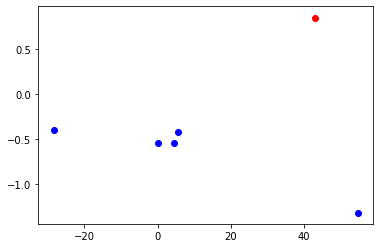

In [129]:
sasa_df['closed'].values[idx_most_dep]

plt.scatter((sasa_df['closed'] - sasa_df['open']).values[idx_most_dep], pos_ave[idx_most_dep], c='b')
plt.scatter((sasa_df['closed'] - sasa_df['open']).values[idx_most_ihb], pos_ave[idx_most_ihb], c='r')

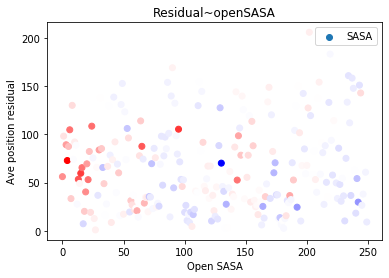

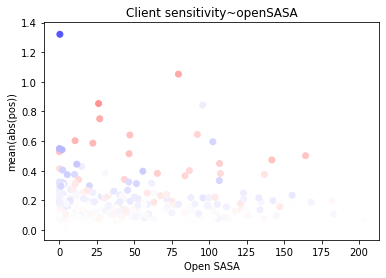

In [134]:
#plt.plot(np.arange(250), pos_ave / np.nanmax(pos_ave), label='pos_ave')
#plt.plot(np.arange(250), hilb_sasa / np.nanmax(hilb_sasa), label='hilbert_SASA')

plt.scatter(np.arange(250), hilb_sasa, c=pos_ave, cmap='bwr', label='SASA', norm=DivergingNorm(0.0))
#plt.scatter(np.arange(250), pos_ave, c=sasa_df['open'] - sasa_df['closed'], cmap='bwr')
#plt.scatter(sasa_df['closed'].values[idx_most_ihb], (sasa_df['closed'] - sasa_df['open']).values[idx_most_ihb], c='r')
#plt.scatter(sasa_df['closed'].values[idx_most_dep], (sasa_df['closed'] - sasa_df['open']).values[idx_most_dep], c='b')

plt.xlabel('Open SASA')
plt.ylabel('Ave position residual')
plt.legend()
plt.title('Residual~openSASA')
plt.show()


plt.scatter(sasa_df['open'], pos_mean_abs, c=pos_ave, cmap='bwr', vmin=-2, vmax=2)
plt.xlabel('Open SASA')
plt.ylabel('mean(abs(pos))')
plt.title('Client sensitivity~openSASA')
plt.show()

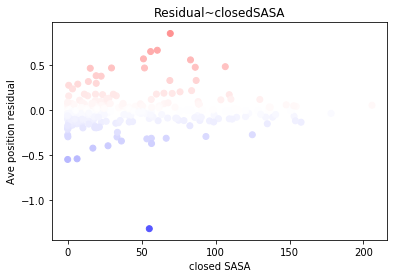

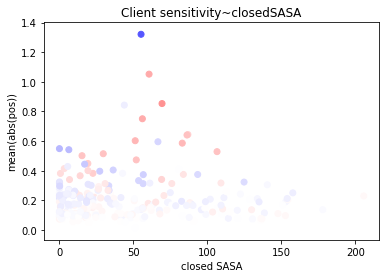

In [131]:
plt.scatter(sasa_df['closed'], pos_ave, c=pos_ave, cmap='bwr', vmin=-2, vmax=2)
plt.xlabel('closed SASA')
plt.ylabel('Ave position residual')
plt.title('Residual~closedSASA')
plt.show()


plt.scatter(sasa_df['closed'], pos_mean_abs, c=pos_ave, cmap='bwr', vmin=-2, vmax=2)
plt.xlabel('closed SASA')
plt.ylabel('mean(abs(pos))')
plt.title('Client sensitivity~closedSASA')
plt.show()

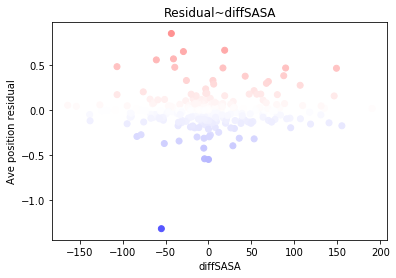

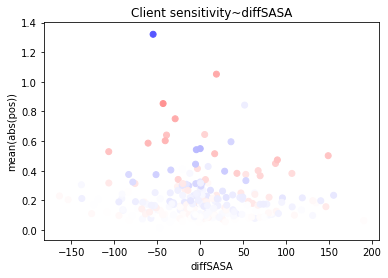

In [104]:
plt.scatter(sasa_df['diff_sasa'], pos_ave, c=pos_ave, cmap='bwr', vmin=-2, vmax=2)
plt.xlabel('diffSASA')
plt.ylabel('Ave position residual')
plt.title('Residual~diffSASA')
plt.show()


plt.scatter(sasa_df['diff_sasa'], pos_mean_abs, c=pos_ave, cmap='bwr', vmin=-2, vmax=2)
plt.xlabel('diffSASA')
plt.ylabel('mean(abs(pos))')
plt.title('Client sensitivity~diffSASA')
plt.show()

In [107]:
def moving_average(a, n=10) :
    ret = np.nancumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

windowed_resids = moving_average(pos_mean_abs)

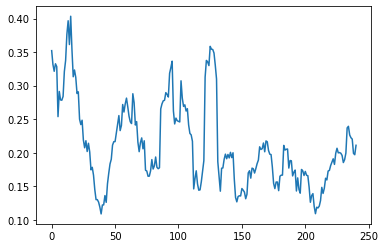

In [108]:
plt.plot(windowed_resids)

In [111]:
point_muts = pd.read_csv('../../utils/point_muts.csv', index_col=0, header=[0,1])
resids = pd.read_csv('../../utils/residuals.csv', index_col=0)


,raw_resids,envision_scaled_resids
_sy,0.043084,0.032878
_wt,0.040423,0.030847
A296R,-0.080219,-0.061215
A296N,0.232412,0.177354
A296D,-0.077679,-0.059277
...,...,...
V478K,-0.057123,-0.043591
V478M,-0.178058,-0.135876
V478S,-0.182977,-0.139630
V478T,0.138661,0.105812


In [113]:
point_muts.columns

MultiIndex([('Radicicol',      'SE'),
            ('Radicicol', 'epsilon'),
            ('Radicicol',   'score'),
            (     'Zero',      'SE'),
            (     'Zero', 'epsilon'),
            (     'Zero',   'score')],
           names=['condition', 'value'])

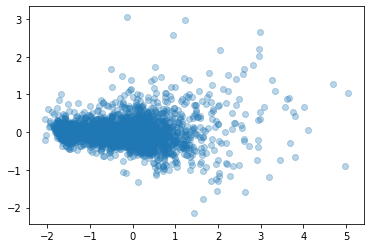

In [115]:
plt.scatter(point_muts.loc[:, ('Zero', 'score')], resids['raw_resids'], alpha=0.3)